# Challenge 1: Classification
In this challenge, you're given a food classification dataset which has 101 classes. You need to analyze and preprocess the dataset as well as build deep learning models for performing food classification. 
<br>
Three models are to be trained for this task, mainly light, medium, and heavy model. <br>
Examples: <br>
Light model - mobilenetv2 <br>
Medium model - Resnet50 <br>
Heavy model - VGG19 <br>
<br>
The above given models are examples. You are free to choose any deep learning model to train. 

**Main Objective**:
You are supposed to use both TensorFlow and PyTorch for this task. You need to train one model for each framework. (You can use one of the frameworks again for the third model)

## Summary 

Create a table for your train and test accuracy as well as speed for each model (mention the framework used for training)

# Analyze the dataset
## Objectives
1. Upload the dataset provided (Google Drive link). 
2. Extract the dataset. 
3. Re-arrange dataset into training and testing folders. 
4. List number of samples in training and testing folders. 
5. Plot sample images from training and testing datasets. 


### 0. Importing the required libraries

In [1]:
import os
import cv2
import time
import random
import collections
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline

from collections import defaultdict
from shutil import copy
from shutil import copytree, rmtree
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras import models
from keras.applications import MobileNetV2 as PTModel
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda

### 1. Uploading the dataset to food-101/data

* Mount the drive to google colab



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 2. Extracting the dataset
* downloading the zipfile to sample_data location
* Unzip the folder to the sample_data location

In [2]:
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz
    print("Extraction done!")

In [3]:
get_data_extract()

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/553447.jpg
food-101/images/cannoli/

In [ ]:
# Extract/unzip the dataset
# uncomment this when you want to mount drive and save data to drive
#import zipfile
#with zipfile.ZipFile("/content/drive/MyDrive/Colab_Notebooks/food-101/data/food-101.zip","r") as zip_ref:
#    zip_ref.extractall("/content/drive/MyDrive/Colab_Notebooks/food-101/data/")

In [ ]:
# delete zip file after extracting the dataset, to save space on drive
#!rm -rf /content/drive/MyDrive/Colab_Notebooks/food-101/data/food-101/food-101.zip

In [4]:
# checking if still the zip file exists in the folder path
#!ls /content/drive/MyDrive/Colab_Notebooks/food-101/data
!ls food-101/

images	license_agreement.txt  meta  README.txt


### 3. Re-arrange dataset into training and testing folders.

In [5]:
# Checking the extracted dataset folder contents
#!ls /content/drive/MyDrive/Colab_Notebooks/food-101/data/food-101/
os.listdir('food-101')


['license_agreement.txt', 'meta', 'README.txt', 'images']

#### checking the number of folders present inside the dataset and their contents

In [6]:
len(os.listdir('food-101/images'))

101

In [7]:
#print(len(os.listdir('/content/drive/MyDrive/Colab_Notebooks/food-101/data/food-101/images')))
#os.listdir('/content/drive/MyDrive/Colab_Notebooks/food-101/data/food-101/images')
os.listdir('food-101/images')


['huevos_rancheros',
 'hamburger',
 'carrot_cake',
 'filet_mignon',
 'chicken_curry',
 'spaghetti_carbonara',
 'miso_soup',
 'tacos',
 'grilled_salmon',
 'french_fries',
 'club_sandwich',
 'ramen',
 'ice_cream',
 'beignets',
 'breakfast_burrito',
 'gyoza',
 'takoyaki',
 'french_toast',
 'dumplings',
 'foie_gras',
 'red_velvet_cake',
 'eggs_benedict',
 'clam_chowder',
 'tiramisu',
 'churros',
 'caesar_salad',
 'spring_rolls',
 'falafel',
 'bread_pudding',
 'chocolate_mousse',
 'sushi',
 'lasagna',
 'creme_brulee',
 'pulled_pork_sandwich',
 'hot_and_sour_soup',
 'crab_cakes',
 'tuna_tartare',
 'oysters',
 'omelette',
 'hot_dog',
 'lobster_bisque',
 'cup_cakes',
 'ravioli',
 'apple_pie',
 'spaghetti_bolognese',
 'fried_rice',
 'pho',
 'sashimi',
 'prime_rib',
 'beef_carpaccio',
 'chocolate_cake',
 'escargots',
 'pork_chop',
 'poutine',
 'macaroni_and_cheese',
 'nachos',
 'scallops',
 'guacamole',
 'cannoli',
 'beet_salad',
 'samosa',
 'pad_thai',
 'macarons',
 'deviled_eggs',
 'strawberry

In [8]:
# listing the contents inside meta folder
#os.listdir('/content/drive/MyDrive/Colab_Notebooks/food-101/data/food-101/meta')
os.listdir('food-101/meta')

['test.txt',
 'train.txt',
 'train.json',
 'test.json',
 'classes.txt',
 'labels.txt']

In [9]:
# lets see the first 5 lines of the train.txt
#!head /content/drive/MyDrive/Colab_Notebooks/food-101/data/food-101/meta/train.txt
!head food-101/meta/train.txt


apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856


In [10]:
# lets see the first 5 lines of the test.txt
#!head /content/drive/MyDrive/Colab_Notebooks/food-101/data/food-101/meta/test.txt
!head food-101/meta/test.txt

apple_pie/1011328
apple_pie/101251
apple_pie/1034399
apple_pie/103801
apple_pie/1038694
apple_pie/1047447
apple_pie/1068632
apple_pie/110043
apple_pie/1106961
apple_pie/1113017


In [11]:
# lets also see the content inside the classes.txt file
#!head /content/drive/MyDrive/Colab_Notebooks/food-101/data/food-101/meta/classes.txt
!head food-101/meta/classes.txt

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito


#### Lets look at 1 random image from each of the folders of 101 classes split across 8 columns and 13 rows

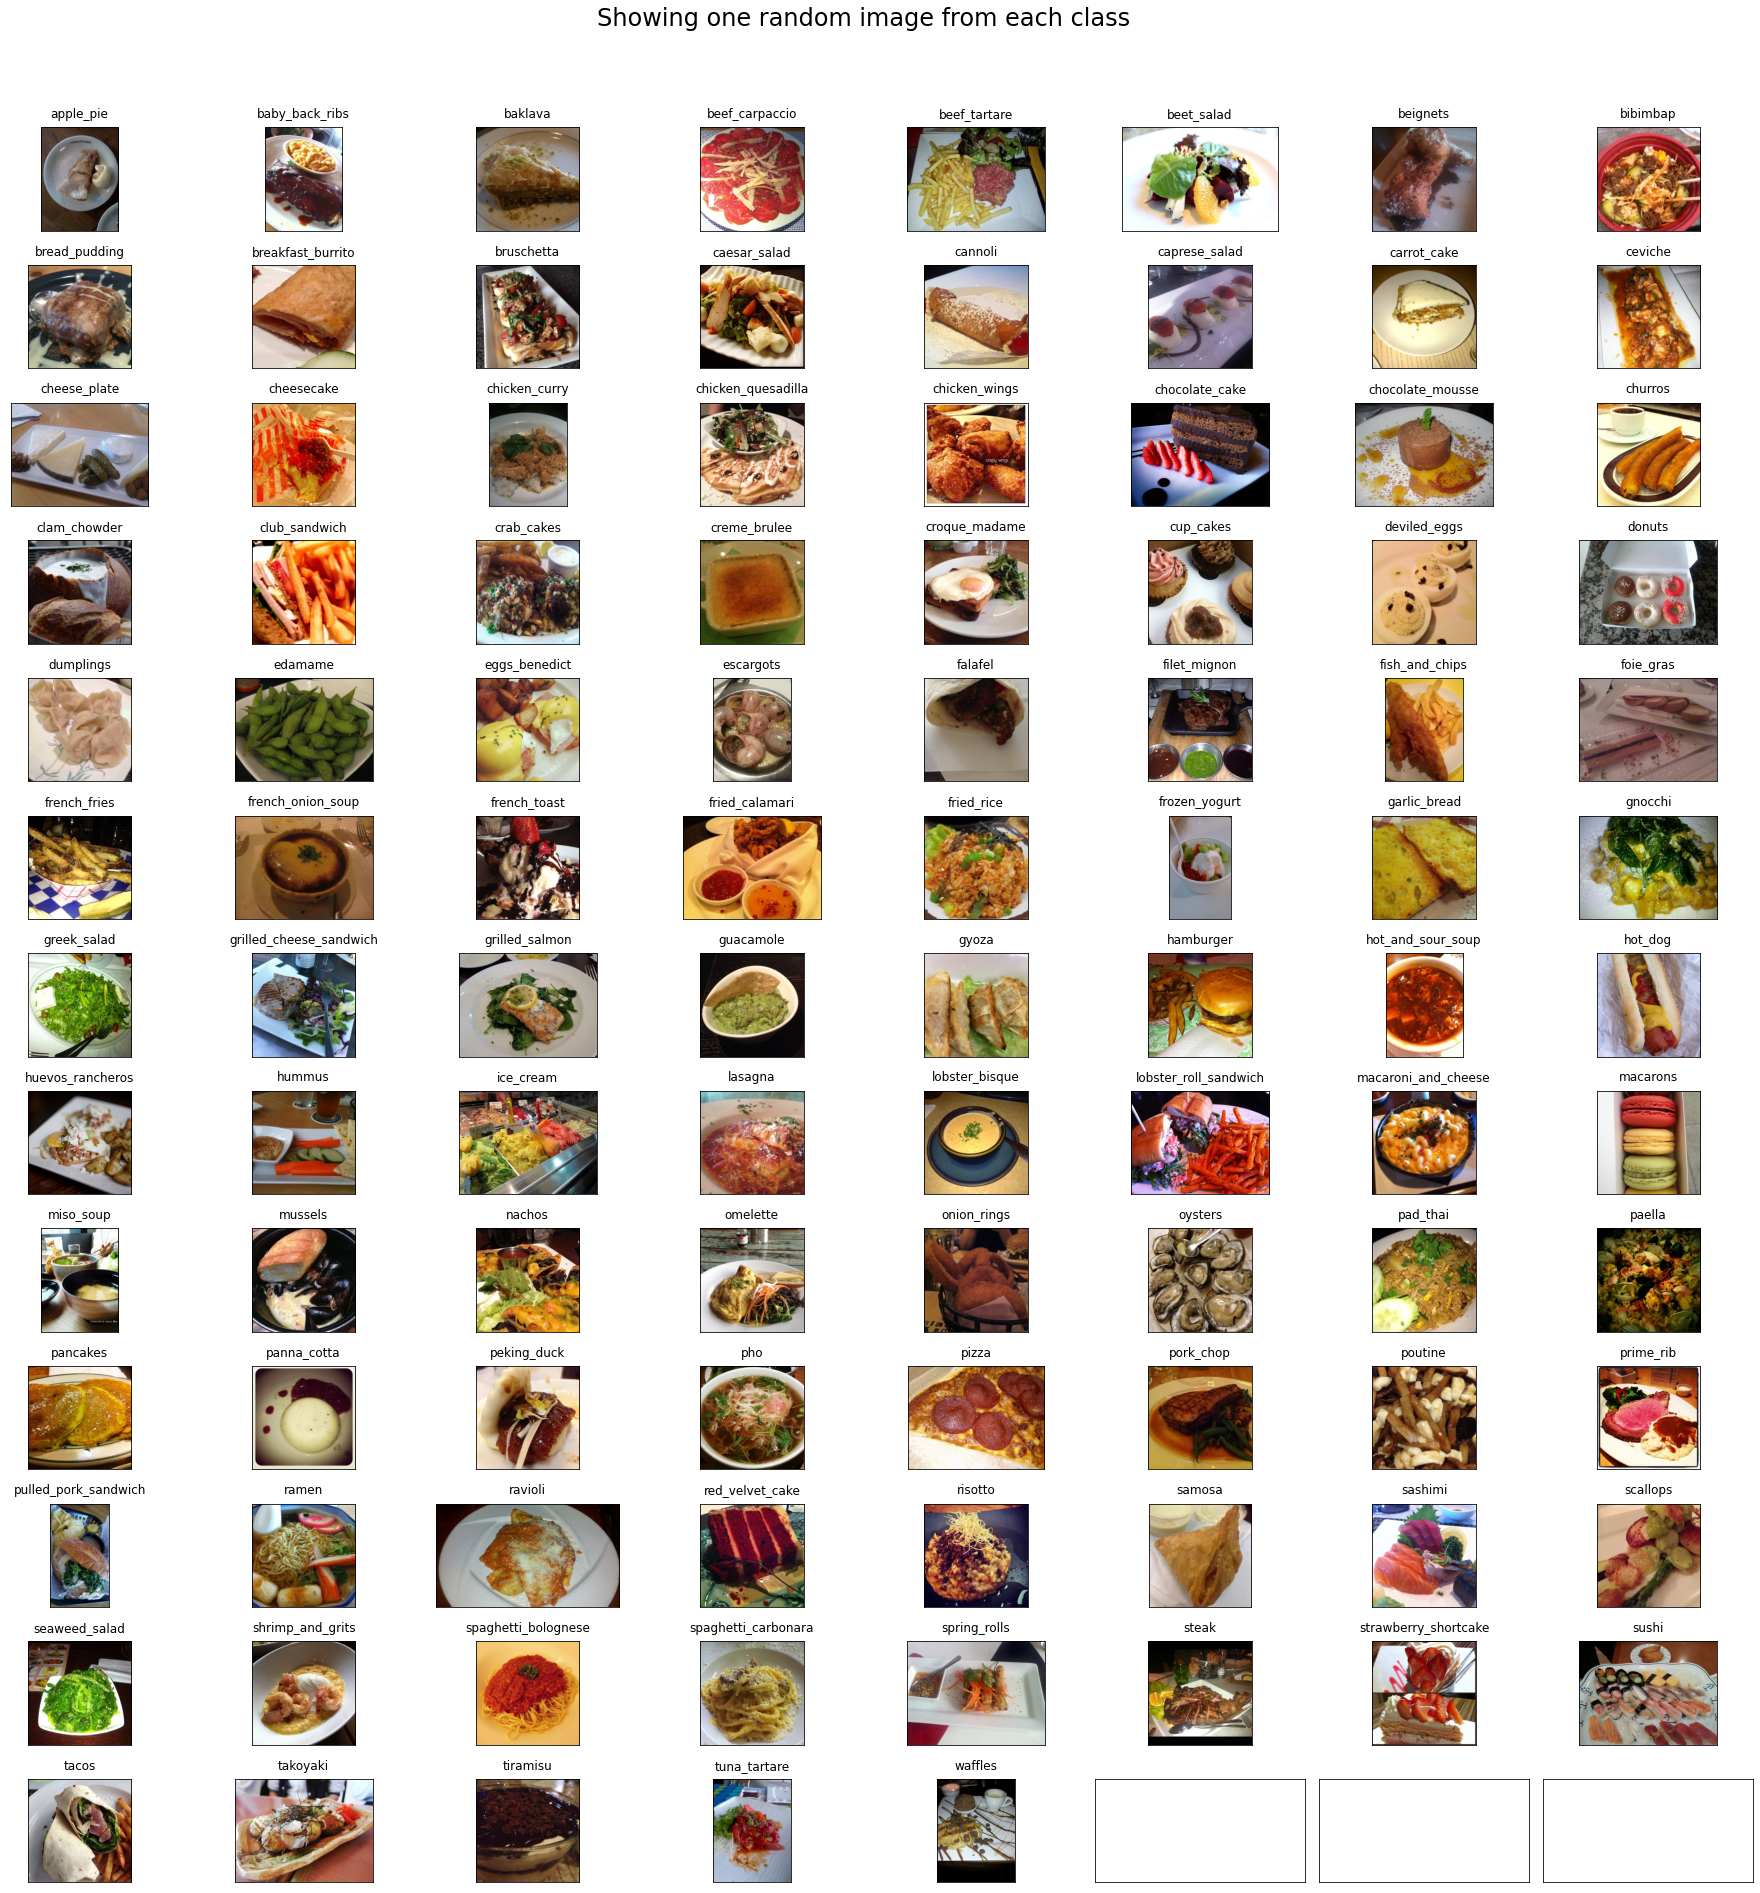

In [12]:
rows = 13
cols = 8

fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

#### Re-arrange dataset into training and testing folders using tran.txt and test.txt.


In [13]:
# Function to re-arrange the dataset
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

#### Prepare train dataset folder by copying images from food-101/images to food-101/train using the file train.txt

In [14]:
# create training data
%cd /
print("Creating train data...")
prepare_data('/content/food-101/meta/train.txt', '/content/food-101/images', '/content/food-101/train')

/
Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying 

#### Prepare test data by copying images from food-101/images to food-101/test using the file test.txt

In [15]:
# create testing data

print("Creating test data...")
prepare_data('/content/food-101/meta/test.txt', '/content/food-101/images', '/content/food-101/test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

### 4. List number of samples in training and testing folders.

In [16]:
print("Total number of samples in train folder")
!find /content/food-101/train/ -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
75750


In [17]:
print("Total number of samples in test folder")
!find /content/food-101/test/ -type d -or -type f -printf '.' | wc -c


Total number of samples in test folder
25250


### 5. Plot sample images from training and testing datasets.

#### Samples from Train dataset

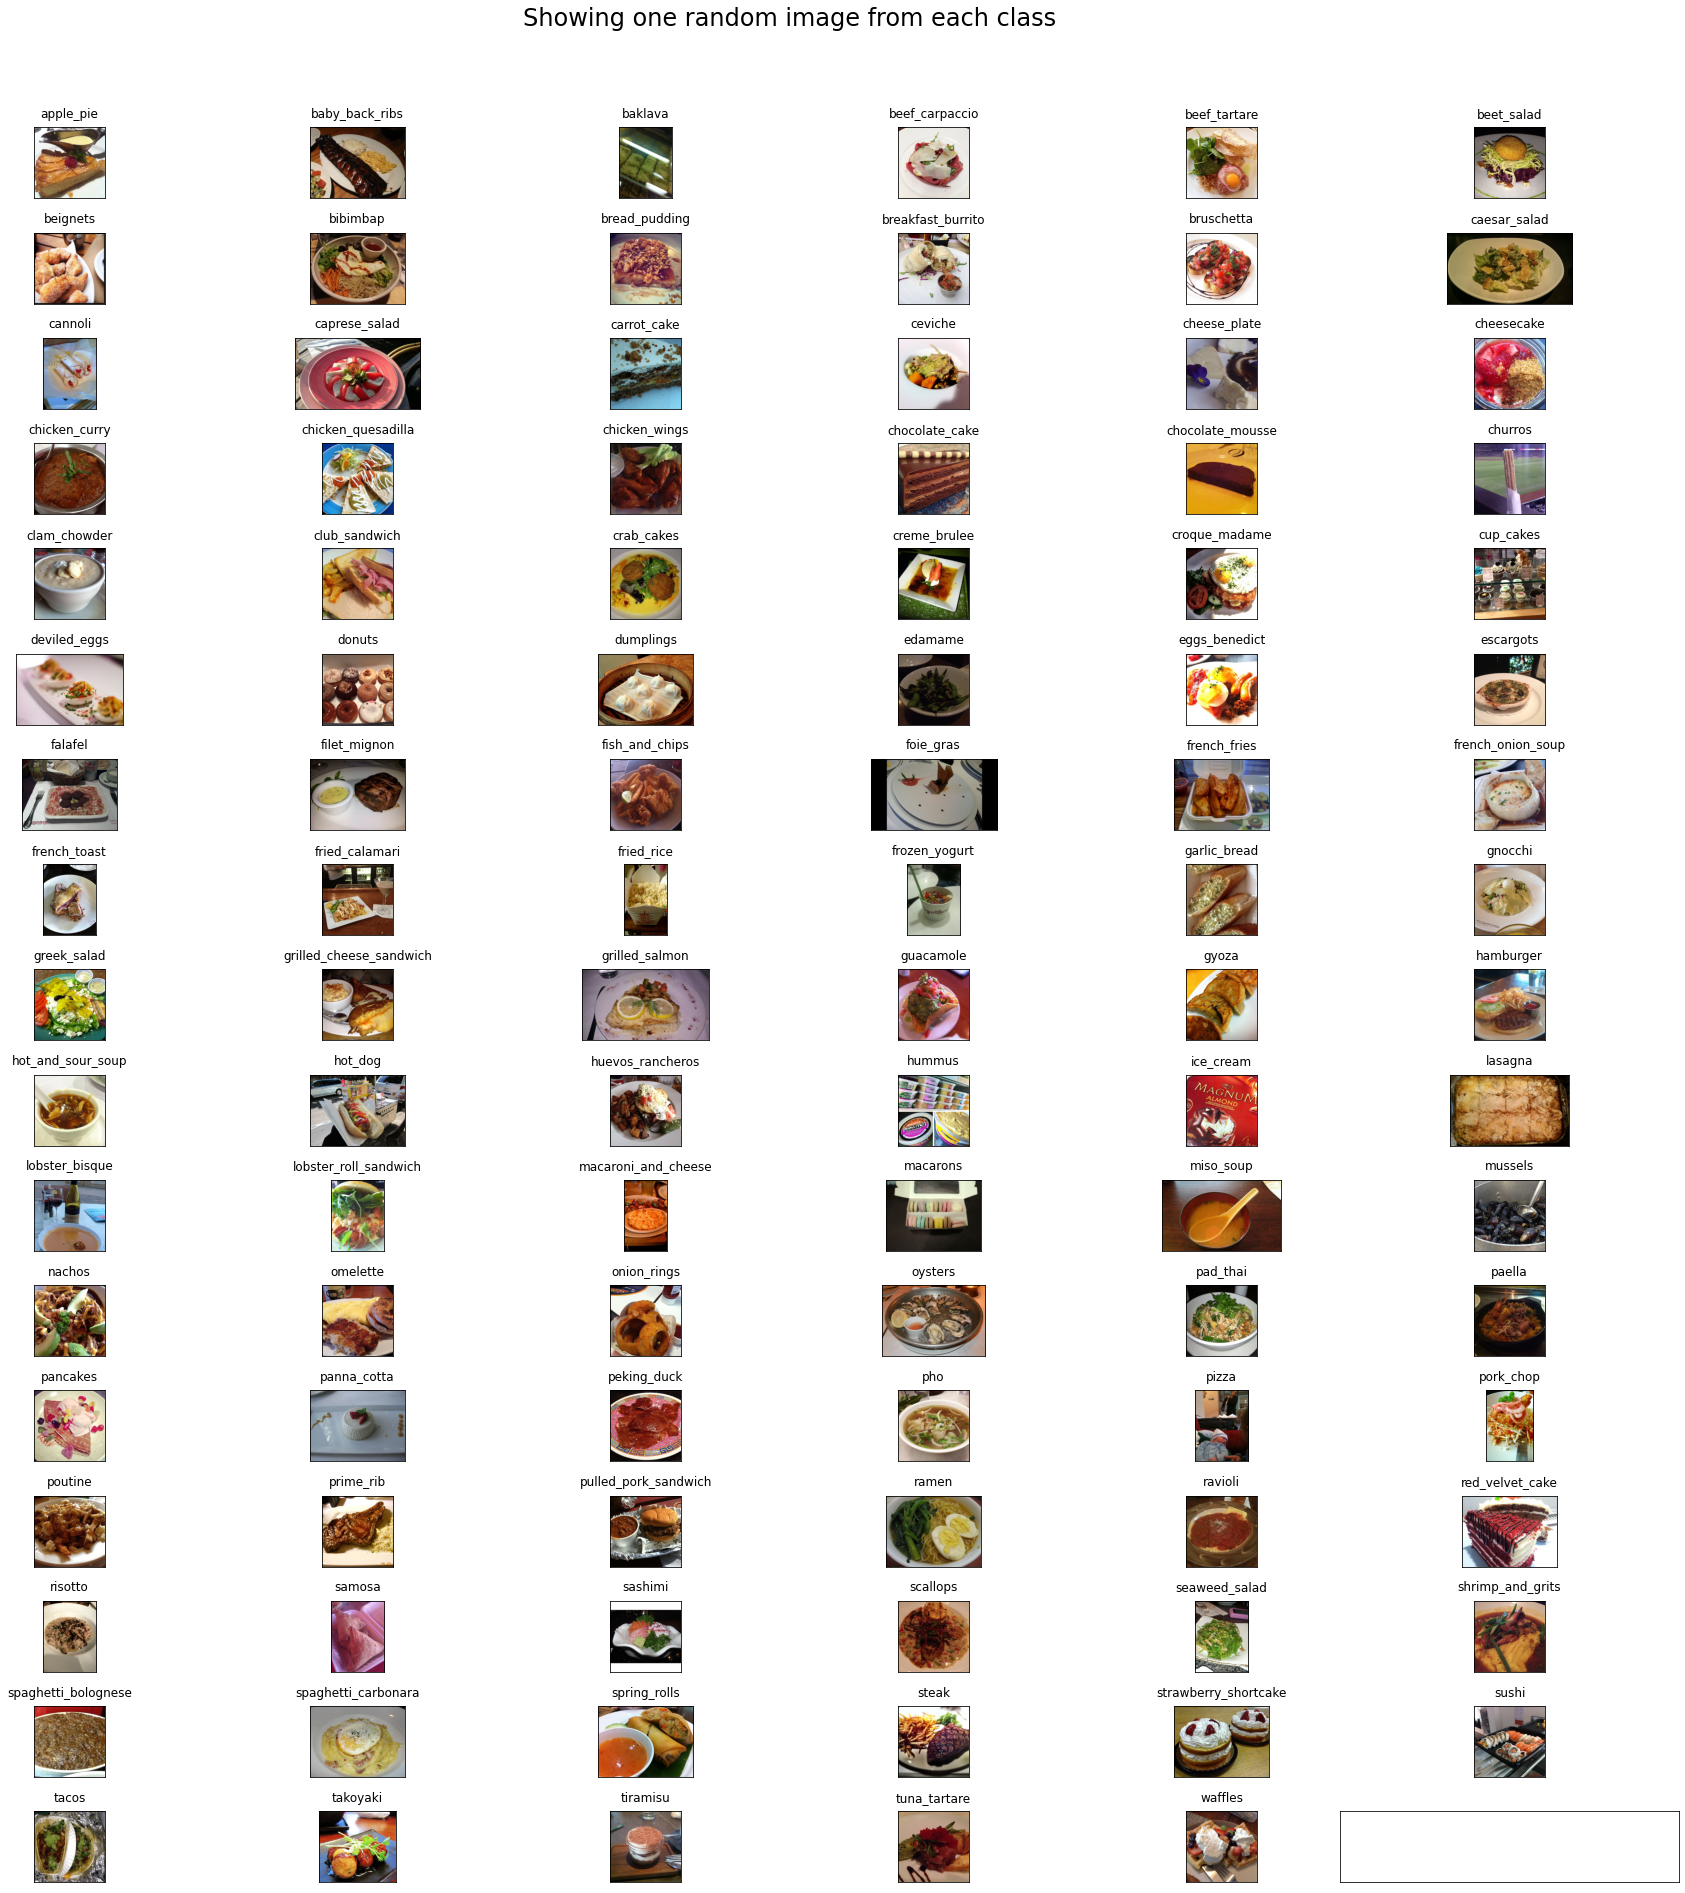

In [18]:
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "/content/food-101/train"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

#### Samples from Test Dataset

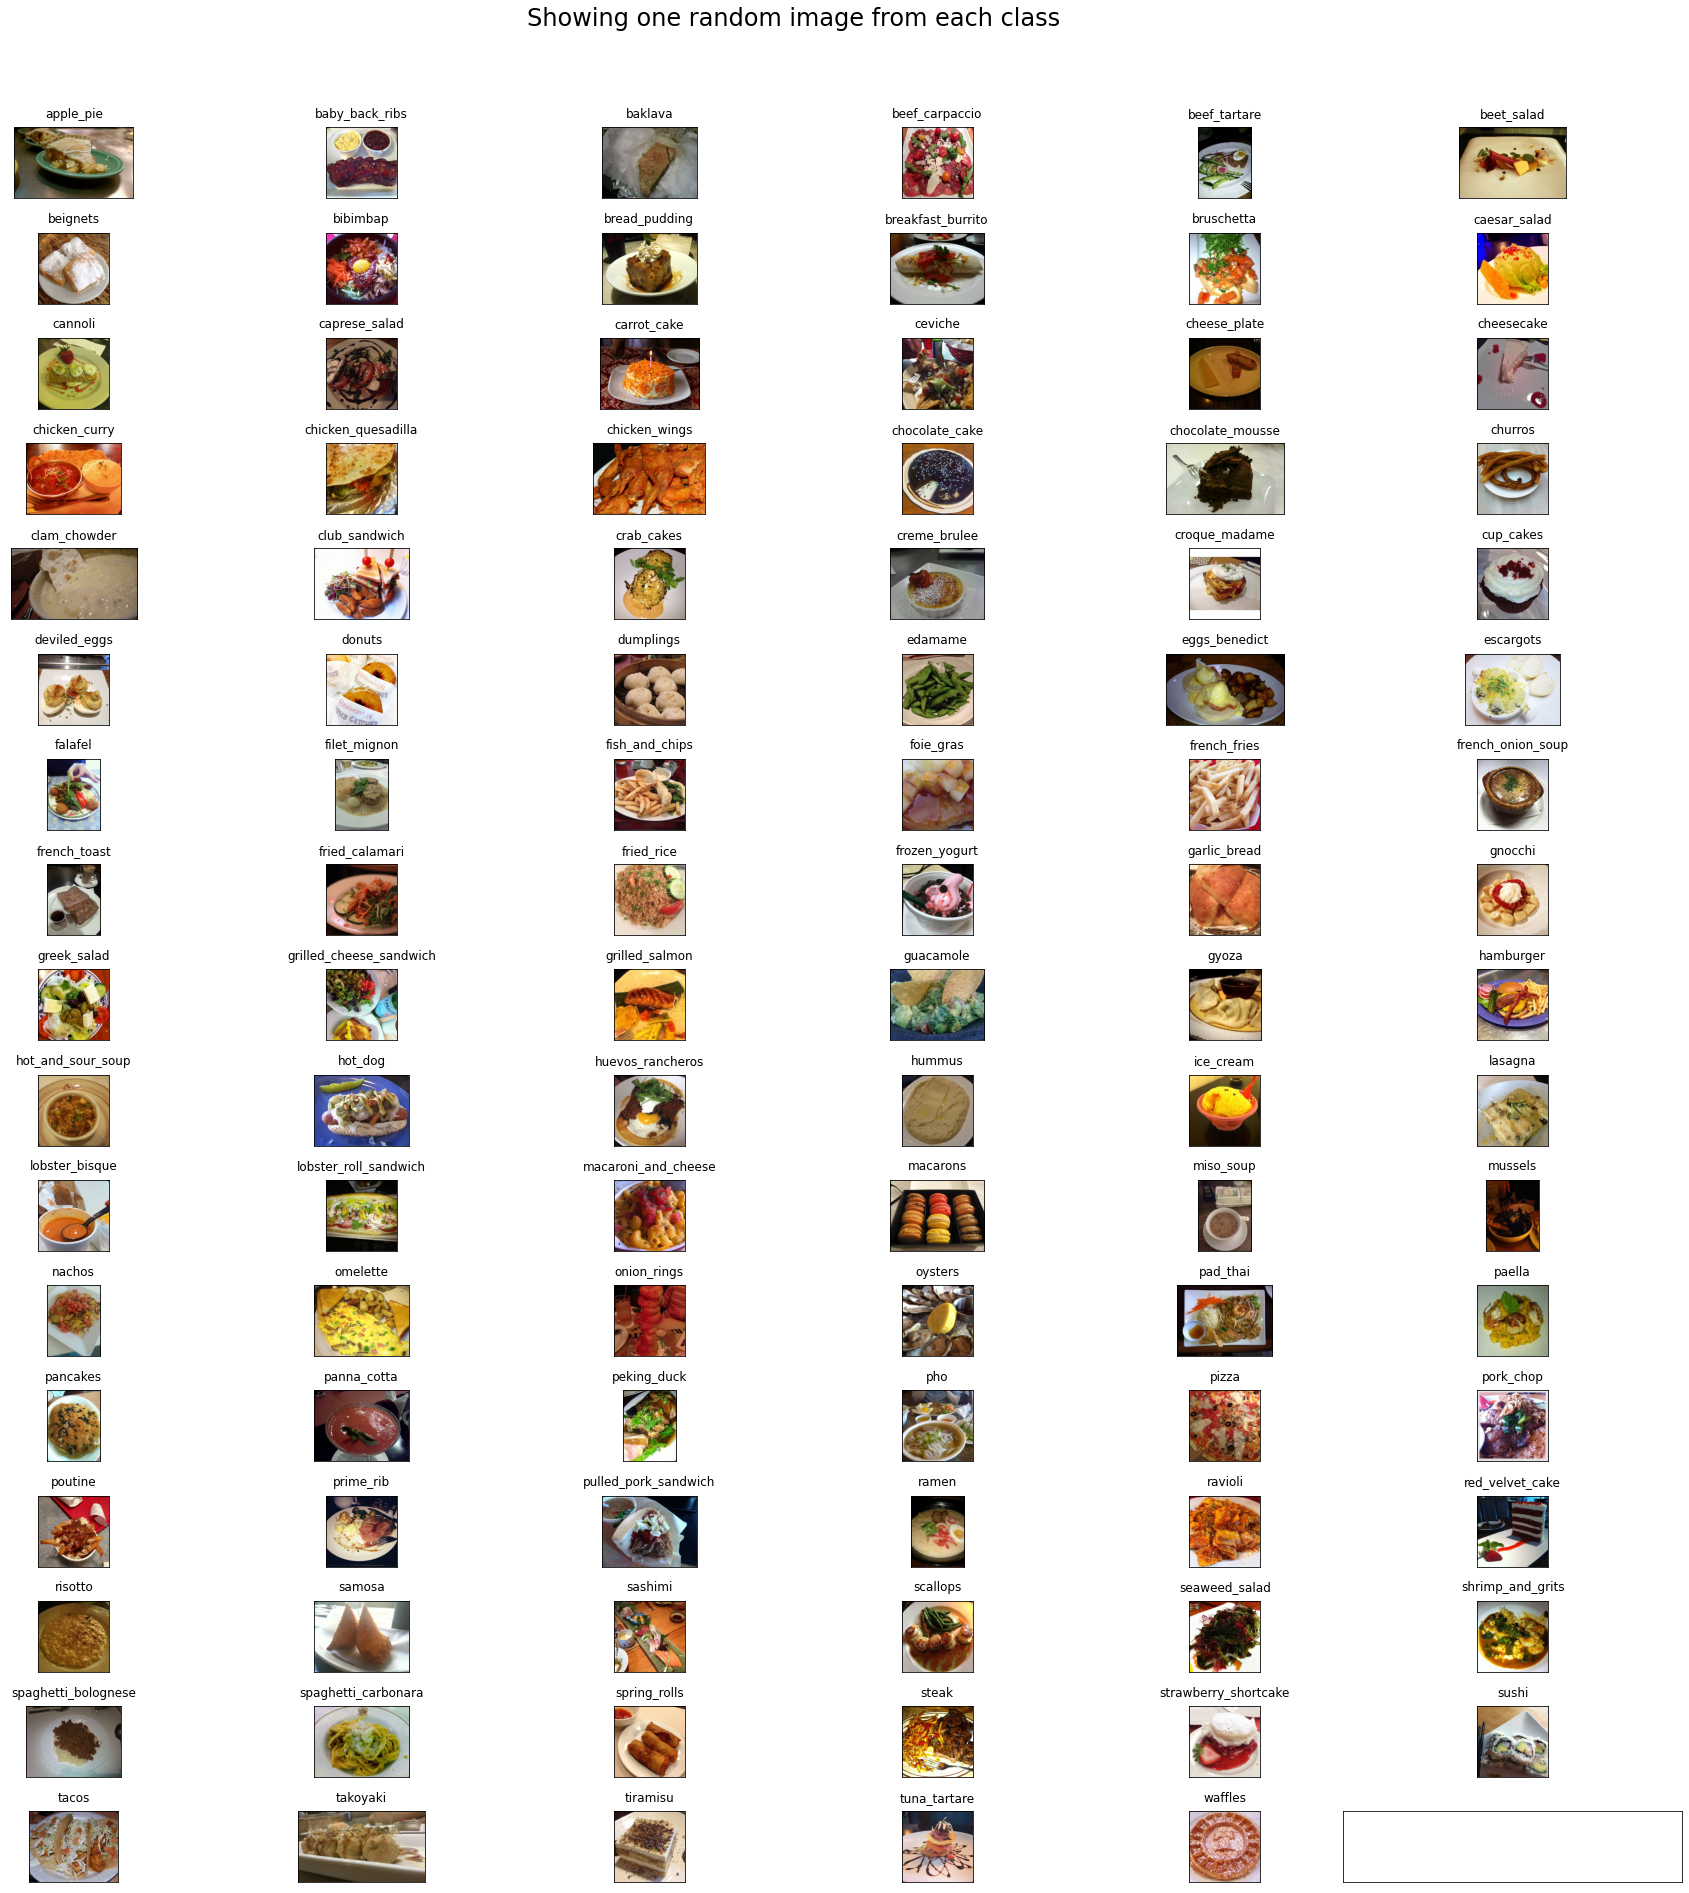

In [19]:
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "/content/food-101/test"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

In [ ]:
del foods_sorted[0]

In [ ]:
foods_sorted


# Pre-process Images
## Objectives
1. Implement preprocessing codes for each model. 
2. Augment the dataset. 
3. Preview the preprocessed dataset. 

### Your Response/Notes

You can summarize your work for this section here/give any explanations if required. 


### Preprocessing steps for light model (class count = 5)


In [ ]:
random.seed(9001)
food_list_mini_index = random.sample(range(0,101),5)
food_list_mini_index

[4, 38, 32, 8, 72]

In [ ]:
 food_list_mini= [foods_sorted[i] for i in food_list_mini_index]
 food_list_mini

['beef_tartare', 'fish_and_chips', 'dumplings', 'bread_pudding', 'pancakes']

In [ ]:
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

In [ ]:
food_list = food_list_mini
src_train = '/content/food-101/train'
dest_train = '/content/food-101/train_mini'
src_test = '/content/food-101/test'
dest_test = '/content/food-101/test_mini'

In [ ]:
print("Creating train_mini data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train_mini data folder with new classes
Copying images into beef_tartare
Copying images into fish_and_chips
Copying images into dumplings
Copying images into bread_pudding
Copying images into pancakes


In [ ]:
print("Creating test_mini data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test_mini data folder with new classes
Copying images into beef_tartare
Copying images into fish_and_chips
Copying images into dumplings
Copying images into bread_pudding
Copying images into pancakes


In [ ]:
print("Total number of samples in train mini folder")

!find /content/food-101/train_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in train mini folder
3750


In [ ]:
print("Total number of samples in test mini folder")

!find /content/food-101/test_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in test mini folder
1250


#### Training model for Mini sized using mobilenetv2




In [ ]:
batch_size = 16
IMG_SIZE = (224, 224) # slightly smaller than vgg16 normally expects
LEARNING_RATE = 1e-4

In [ ]:
import tensorflow as tf
from keras import backend as K
from keras.applications.vgg16 import preprocess_input
import numpy as np
def tf_image_loader(out_size, 
                      horizontal_flip = True, 
                      vertical_flip = False, 
                     random_brightness = True,
                     random_contrast = True,
                    random_saturation = True,
                    random_hue = True,
                      color_mode = 'rgb',
                       preproc_func = preprocess_input,
                       on_batch = False):
    def _func(X):
        with tf.name_scope('image_augmentation'):
            with tf.name_scope('input'):
                X = tf.image.decode_png(tf.read_file(X), channels = 3 if color_mode == 'rgb' else 0)
                X = tf.image.resize_images(X[:,:,::-1], out_size)
            with tf.name_scope('augmentation'):
                if horizontal_flip:
                    X = tf.image.random_flip_left_right(X)
                if vertical_flip:
                    X = tf.image.random_flip_up_down(X)
                if random_brightness:
                    X = tf.image.random_brightness(X, max_delta = 0.15)
                if random_saturation:
                    X = tf.image.random_saturation(X, lower = 0.5, upper = 2)
                if random_hue:
                    X = tf.image.random_hue(X, max_delta = 0.15)
                if random_contrast:
                    X = tf.image.random_contrast(X, lower = 0.75, upper = 1.5)
                return preproc_func(X)
    if on_batch: 
        # we are meant to use it on a batch
        def _batch_func(X, y):
            return tf.map_fn(_func, X), y
        return _batch_func
    else:
        # we apply it to everything
        def _all_func(X, y):
            return _func(X), y         
        return _all_func
    
def tf_augmentor(out_size,
                intermediate_size = (480, 480),
                 intermediate_trans = 'crop',
                 batch_size = 16,
                   horizontal_flip = True, 
                  vertical_flip = False, 
                 random_brightness = True,
                 random_contrast = True,
                 random_saturation = True,
                    random_hue = True,
                  color_mode = 'rgb',
                   preproc_func = preprocess_input,
                   min_crop_percent = 0.001,
                   max_crop_percent = 0.005,
                   crop_probability = 0.5,
                   rotation_range = 10):
    
    load_ops = tf_image_loader(out_size = intermediate_size, 
                               horizontal_flip=horizontal_flip, 
                               vertical_flip=vertical_flip, 
                               random_brightness = random_brightness,
                               random_contrast = random_contrast,
                               random_saturation = random_saturation,
                               random_hue = random_hue,
                               color_mode = color_mode,
                               preproc_func = preproc_func,
                               on_batch=False)
    def batch_ops(X, y):
        batch_size = tf.shape(X)[0]
        with tf.name_scope('transformation'):
            # code borrowed from https://becominghuman.ai/data-augmentation-on-gpu-in-tensorflow-13d14ecf2b19
            # The list of affine transformations that our image will go under.
            # Every element is Nx8 tensor, where N is a batch size.
            transforms = []
            identity = tf.constant([1, 0, 0, 0, 1, 0, 0, 0], dtype=tf.float32)
            if rotation_range > 0:
                angle_rad = rotation_range / 180 * np.pi
                angles = tf.random_uniform([batch_size], -angle_rad, angle_rad)
                transforms += [tf.contrib.image.angles_to_projective_transforms(angles, intermediate_size[0], intermediate_size[1])]

            if crop_probability > 0:
                crop_pct = tf.random_uniform([batch_size], min_crop_percent, max_crop_percent)
                left = tf.random_uniform([batch_size], 0, intermediate_size[0] * (1.0 - crop_pct))
                top = tf.random_uniform([batch_size], 0, intermediate_size[1] * (1.0 - crop_pct))
                crop_transform = tf.stack([
                      crop_pct,
                      tf.zeros([batch_size]), top,
                      tf.zeros([batch_size]), crop_pct, left,
                      tf.zeros([batch_size]),
                      tf.zeros([batch_size])
                  ], 1)
                coin = tf.less(tf.random_uniform([batch_size], 0, 1.0), crop_probability)
                transforms += [tf.where(coin, crop_transform, tf.tile(tf.expand_dims(identity, 0), [batch_size, 1]))]
            if len(transforms)>0:
                X = tf.contrib.image.transform(X,
                      tf.contrib.image.compose_transforms(*transforms),
                      interpolation='BILINEAR') # or 'NEAREST'
            if intermediate_trans=='scale':
                X = tf.image.resize_images(X, out_size)
            elif intermediate_trans=='crop':
                X = tf.image.resize_image_with_crop_or_pad(X, out_size[0], out_size[1])
            else:
                raise ValueError('Invalid Operation {}'.format(intermediate_trans))
            return X, y
    def _create_pipeline(in_ds):
        batch_ds = in_ds.map(load_ops, num_parallel_calls=4).batch(batch_size)
        return batch_ds.map(batch_ops)
    return _create_pipeline

In [ ]:
def flow_from_dataframe(idg, 
                        in_df, 
                        path_col,
                        y_col, 
                        shuffle = True, 
                        color_mode = 'rgb'):
    files_ds = tf.data.Dataset.from_tensor_slices((in_df[path_col].values, 
                                                   np.stack(in_df[y_col].values,0)))
    in_len = in_df[path_col].values.shape[0]
    while True:
        if shuffle:
            files_ds = files_ds.shuffle(in_len) # shuffle the whole dataset
        
        next_batch = idg(files_ds).repeat().make_one_shot_iterator().get_next()
        for i in range(max(in_len//32,1)):
            # NOTE: if we loop here it is 'thread-safe-ish' if we loop on the outside it is completely unsafe
            yield K.get_session().run(next_batch)


In [ ]:
core_idg = tf_augmentor(out_size = IMG_SIZE, 
                        color_mode = 'rgb', 
                        vertical_flip = True,
                        crop_probability=0.0, # crop doesn't work yet
                        rotation_range = 0,
                        batch_size = batch_size) 
valid_idg = tf_augmentor(out_size = IMG_SIZE, color_mode = 'rgb', 
                         crop_probability=0.0, 
                         horizontal_flip = False, 
                         vertical_flip = False, 
                         random_brightness = False,
                         random_contrast = False,
                         random_saturation = False,
                         random_hue = False,
                         rotation_range = 0,
                        batch_size = batch_size)

train_gen = flow_from_dataframe(core_idg, '/content/food-101/train_mini', 
                             path_col = 'path',
                            y_col = 'cat_vec')

valid_gen = flow_from_dataframe(valid_idg, '/content/food-101/test_mini', 
                             path_col = 'path',
                            y_col = 'cat_vec') # we can use much larger batches for evaluation

In [ ]:
K.clear_session()
n_classes = 5
img_width, img_height = 299, 299
train_data_dir = '/content/food-101/train_mini'
validation_data_dir = '/content/food-101/test_mini'
nb_train_samples = 3750 
nb_validation_samples = 1250
batch_size = 40

train_datagen = ImageDataGenerator(rescale=1. / 255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 3750 images belonging to 5 classes.
Found 1250 images belonging to 5 classes.


#### Training set 
These are augmented and a real mess



In [ ]:
t_x, t_y = next(train_generator)

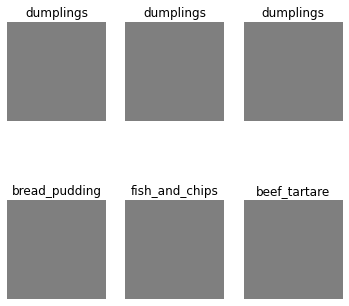

In [ ]:
fig, m_axs = plt.subplots(2, 3, figsize = (6,6))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(np.clip(c_x+127, 0, 255).astype(np.uint8))
    c_ax.set_title('{}'.format(food_list_mini[np.argmax(c_y, -1)]))
    c_ax.axis('off')

#### Validation Set
We do not perform augmentation at all on these images

In [ ]:
t_x1, t_y1 = next(validation_generator)

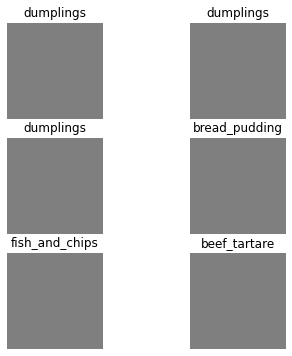

In [ ]:
fig, m_axs = plt.subplots(3, 2, figsize = (6,6))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(np.clip(c_x+127, 0, 255).astype(np.uint8))
    c_ax.set_title('{}'.format(food_list_mini[np.argmax(c_y, -1)]))
    c_ax.axis('off')

In [ ]:
food_model = PTModel(input_shape = t_x.shape[1:], 
                                include_top = True, 
                                weights = None, # 'imagenet')
                                classes=t_y.shape[-1]
                               )

In [ ]:
from keras.metrics import top_k_categorical_accuracy
from keras.losses import categorical_crossentropy, binary_crossentropy
from keras.optimizers import Adam
def top_5_accuracy(in_gt, in_pred):
    return top_k_categorical_accuracy(in_gt, in_pred, k=5)

food_model.compile(optimizer = Adam(lr=LEARNING_RATE), 
                   loss = 'categorical_crossentropy',
                   metrics = ['categorical_accuracy', top_5_accuracy])
food_model.summary()

Model: "mobilenetv2_1.00_299"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 150, 150, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 150, 150, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 150, 150, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('food')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=6) 
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [ ]:
food_model.fit_generator(train_generator, 
                           steps_per_epoch = nb_train_samples//batch_size,
                           validation_data = validation_generator, 
                           validation_steps = 10, #valid_df.shape[0]//batch_size,
                              epochs = 3, 
                              callbacks = callbacks_list,
                             workers = 0, # tf-generators are not thread-safe
                             use_multiprocessing=False, 
                             max_queue_size = 10
                            )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
93/93 [==============================] - 1403s 15s/step - loss: 1.6515 - categorical_accuracy: 0.2620 - top_5_accuracy: 1.0000 - val_loss: 1.6079 - val_categorical_accuracy: 0.2075 - val_top_5_accuracy: 1.0000

Epoch 00001: val_loss improved from inf to 1.60791, saving model to food_weights.best.hdf5
Epoch 2/3
93/93 [==============================] - 1391s 15s/step - loss: 1.4568 - categorical_accuracy: 0.3845 - top_5_accuracy: 1.0000 - val_loss: 1.6103 - val_categorical_accuracy: 0.1975 - val_top_5_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 1.60791
Epoch 3/3
93/93 [==============================] - 1396s 15s/step - loss: 1.3487 - categorical_accuracy: 0.4332 - top_5_accuracy: 1.0000 - val_loss: 1.6122 - val_categorical_accuracy: 0.2200 - val_top_5_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 1.60791


In [ ]:
food_model.load_weights(weight_path)
food_model.save('mini_food_model.h5')

In [ ]:
import gc
gc.enable()
gc.collect()

8

In [ ]:
##### create one fixed dataset for evaluating
import tqdm
from tqdm import tqdm_notebook
# fresh valid gen
valid_df='/content/food-101/test_mini'
valid_gen = flow_from_dataframe(validation_generator, valid_df, path_col = 'path', y_col = 'cat_vec') 
vbatch_count = min(5, (10-1))
out_size = vbatch_count*batch_size


In [ ]:
test_X = np.zeros((out_size,)+t_x.shape[1:], dtype = np.float32)
test_Y = np.zeros((out_size,)+t_y.shape[1:], dtype = np.float32)


In [ ]:
for i, (c_x, c_y) in zip(range(vbatch_count), validation_generator):
    j = i*batch_size
    test_X[j:(j+c_x.shape[0])] = c_x
    test_Y[j:(j+c_x.shape[0])] = c_y

#### Evaluate the results
Here we evaluate the results by loading the best version of the model and seeing how the predictions look on the results. We then visualize spec

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
pred_Y = food_model.predict(test_X, batch_size = 32, verbose = True)
pred_Y_cat = np.argmax(pred_Y, -1)
test_Y_cat = np.argmax(test_Y, -1)
print('Accuracy on Test Data: %2.2f%%' % (100*accuracy_score(test_Y_cat, pred_Y_cat)))
print(classification_report(test_Y_cat, pred_Y_cat, target_names = food_list_mini))

7/7 [==============================] - 11s 2s/step
Accuracy on Test Data: 20.00%
                precision    recall  f1-score   support

  beef_tartare       0.00      0.00      0.00        37
fish_and_chips       0.20      1.00      0.33        40
     dumplings       0.00      0.00      0.00        37
 bread_pudding       0.00      0.00      0.00        41
      pancakes       0.00      0.00      0.00        45

      accuracy                           0.20       200
     macro avg       0.04      0.20      0.07       200
  weighted avg       0.04      0.20      0.07       200



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
acc = food_model.food_model.acc
val_acc = food_model.food_model.val_acc
loss = food_model.food_model.loss
val_loss = food_model.food_model.val_loss

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig, ax1 = plt.subplots(1,1, figsize = (20, 20))
sns.heatmap(confusion_matrix(test_Y_cat, pred_Y_cat), 
            annot=False, fmt="d", cbar = False, cmap = plt.cm.Blues, vmax = test_X.shape[0]//16, ax = ax1)

### Preprocessing steps for medium model(class count = 20), using InceptionV3

* lets further divide train test datasets into train_medium and test_medium with class count of 20

In [20]:
random.seed(9001)
food_list_medium_index = random.sample(range(0,101),20)
food_list_medium_index

[4, 38, 32, 8, 72, 77, 65, 6, 91, 84, 34, 78, 80, 68, 81, 97, 99, 45, 37, 75]

In [21]:
 food_list_medium= [foods_sorted[i] for i in food_list_medium_index]
 food_list_medium

['beef_tartare',
 'fish_and_chips',
 'dumplings',
 'bread_pudding',
 'pancakes',
 'pork_chop',
 'mussels',
 'beignets',
 'spaghetti_carbonara',
 'risotto',
 'eggs_benedict',
 'poutine',
 'pulled_pork_sandwich',
 'onion_rings',
 'ramen',
 'takoyaki',
 'tuna_tartare',
 'frozen_yogurt',
 'filet_mignon',
 'pho']

In [22]:
def dataset_medium(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

In [23]:
food_list = food_list_medium
src_train = '/content/food-101/train'
dest_train = '/content/food-101/train_medium'
src_test = '/content/food-101/test'
dest_test = '/content/food-101/test_medium'

In [24]:
print("Creating train_medium data folder with new classes")
dataset_medium(food_list, src_train, dest_train)

Creating train_medium data folder with new classes
Copying images into beef_tartare
Copying images into fish_and_chips
Copying images into dumplings
Copying images into bread_pudding
Copying images into pancakes
Copying images into pork_chop
Copying images into mussels
Copying images into beignets
Copying images into spaghetti_carbonara
Copying images into risotto
Copying images into eggs_benedict
Copying images into poutine
Copying images into pulled_pork_sandwich
Copying images into onion_rings
Copying images into ramen
Copying images into takoyaki
Copying images into tuna_tartare
Copying images into frozen_yogurt
Copying images into filet_mignon
Copying images into pho


In [25]:
print("Creating test_medium data folder with new classes")
dataset_medium(food_list, src_test, dest_test)

Creating test_medium data folder with new classes
Copying images into beef_tartare
Copying images into fish_and_chips
Copying images into dumplings
Copying images into bread_pudding
Copying images into pancakes
Copying images into pork_chop
Copying images into mussels
Copying images into beignets
Copying images into spaghetti_carbonara
Copying images into risotto
Copying images into eggs_benedict
Copying images into poutine
Copying images into pulled_pork_sandwich
Copying images into onion_rings
Copying images into ramen
Copying images into takoyaki
Copying images into tuna_tartare
Copying images into frozen_yogurt
Copying images into filet_mignon
Copying images into pho


In [26]:
print("Total number of samples in train medium folder")

!find /content/food-101/train_medium -type d -or -type f -printf '.' | wc -c

Total number of samples in train medium folder
15000


In [27]:
print("Total number of samples in test medium folder")

!find /content/food-101/test_medium -type d -or -type f -printf '.' | wc -c

Total number of samples in test medium folder
5000


#### Training model for medium sized using InceptionV3



In [28]:
K.clear_session()
n_classes = 20
img_width, img_height = 299, 299
train_data_dir = '/content/food-101/train_medium'
validation_data_dir = '/content/food-101/test_medium'
nb_train_samples = 15000 
nb_validation_samples = 5000
batch_size = 40

train_datagen = ImageDataGenerator(rescale=1. / 255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [29]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 15000 images belonging to 20 classes.
Found 5000 images belonging to 20 classes.


In [30]:
inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(20,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

87916544/87910968 [==============================] - 1s 0us/step


In [31]:
%%time
model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_3class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_3class.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=3,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
375/375 [==============================] - 13747s 37s/step - loss: 3.1660 - accuracy: 0.0954 - val_loss: 2.6299 - val_accuracy: 0.4208

Epoch 00001: val_loss improved from inf to 2.62995, saving model to best_model_3class.hdf5
Epoch 2/3
375/375 [==============================] - 13171s 35s/step - loss: 2.5573 - accuracy: 0.3818 - val_loss: 1.8968 - val_accuracy: 0.6102

Epoch 00002: val_loss improved from 2.62995 to 1.89684, saving model to best_model_3class.hdf5
Epoch 3/3
375/375 [==============================] - 13342s 36s/step - loss: 1.9542 - accuracy: 0.5475 - val_loss: 1.4090 - val_accuracy: 0.7128

Epoch 00003: val_loss improved from 1.89684 to 1.40904, saving model to best_model_3class.hdf5
CPU times: user 21h 43min 21s, sys: 15min 5s, total: 21h 58min 27s
Wall time: 11h 11min 3s


Interrupted training medium model as it requires ~15hrs to get trained, need a GPU to train this kind of model :)

In [53]:
model.save('model_trained_20class.hdf5')

In [54]:
class_map_20 = train_generator.class_indices
class_map_20

{'beef_tartare': 0,
 'beignets': 1,
 'bread_pudding': 2,
 'dumplings': 3,
 'eggs_benedict': 4,
 'filet_mignon': 5,
 'fish_and_chips': 6,
 'frozen_yogurt': 7,
 'mussels': 8,
 'onion_rings': 9,
 'pancakes': 10,
 'pho': 11,
 'pork_chop': 12,
 'poutine': 13,
 'pulled_pork_sandwich': 14,
 'ramen': 15,
 'risotto': 16,
 'spaghetti_carbonara': 17,
 'takoyaki': 18,
 'tuna_tartare': 19}

In [48]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

In [47]:
for key in history.history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


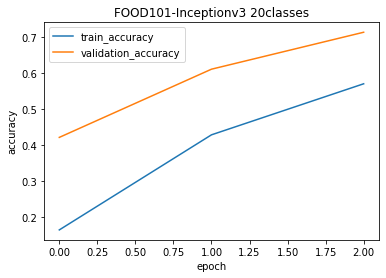

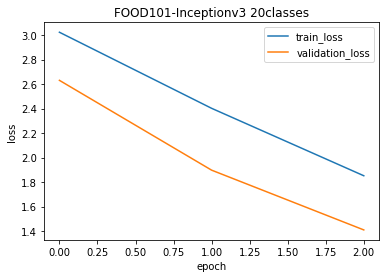

In [56]:
plot_accuracy(history,'FOOD101-Inceptionv3 20classes')
plot_loss(history,'FOOD101-Inceptionv3 20classes')

In [57]:
%%time
# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model('model_trained_20class.hdf5',compile = False)

CPU times: user 2.09 s, sys: 53 ms, total: 2.14 s
Wall time: 2.01 s


Setting compile=False and clearing the session leads to faster loading of the saved model
Withouth the above addiitons, model loading was taking more than a minute!

In [58]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

Downloading images from internet to predict the food class

In [69]:
!wget -O onion_rings.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRr6To-DRy0InuP-mMOtVCbsud6WVFcztVjKw&usqp=CAU

!wget ramen.jpg https://upload.wikimedia.org/wikipedia/commons/4/42/Ramen.jpg

!wget pancakes.jpg https://upload.wikimedia.org/wikipedia/commons/3/34/Make_a_pancake.jpg

--2021-01-23 07:37:54--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRr6To-DRy0InuP-mMOtVCbsud6WVFcztVjKw
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 173.194.214.102, 173.194.214.100, 173.194.214.101, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|173.194.214.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12435 (12K) [image/jpeg]
Saving to: ‘onion_rings.jpg’

onion_rings.jpg     100%[===================>]  12.14K  --.-KB/s    in 0s      

2021-01-23 07:37:54 (84.9 MB/s) - ‘onion_rings.jpg’ saved [12435/12435]

--2021-01-23 07:37:55--  http://ramen.jpg/
Resolving ramen.jpg (ramen.jpg)... failed: Name or service not known.
wget: unable to resolve host address ‘ramen.jpg’
--2021-01-23 07:37:55--  https://upload.wikimedia.org/wikipedia/commons/4/42/Ramen.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikim

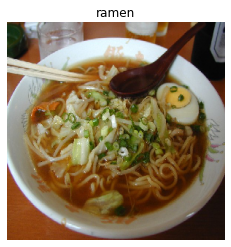

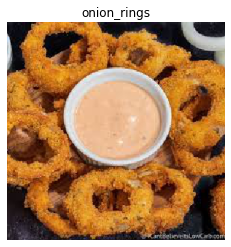

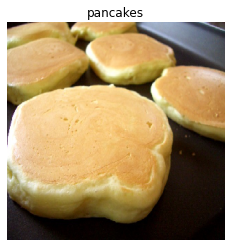

In [70]:
images = []

images.append('Ramen.jpg')
images.append('onion_rings.jpg')
images.append('Make_a_pancake.jpg')
predict_class(model_best, images, True)

Our model predicted 100% correctly for all the 3 images we fed

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
pred_Y = history.predict(test_X, batch_size = 32, verbose = True)
pred_Y_cat = np.argmax(pred_Y, -1)
test_Y_cat = np.argmax(test_Y, -1)
print('Accuracy on Test Data: %2.2f%%' % (100*accuracy_score(test_Y_cat, pred_Y_cat)))
print(classification_report(test_Y_cat, pred_Y_cat, target_names = food_list_mini))

In [1]:
%load_ext tensorboard

In [2]:
import datetime, os

In [3]:
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

### Preprocessing steps for heavier model (class count = 75)

In [ ]:
random.seed(9001)
food_list_heavy_index = random.sample(range(0,101),75)
food_list_heavy_index


[4,
 38,
 32,
 8,
 72,
 98,
 96,
 77,
 65,
 6,
 84,
 34,
 78,
 80,
 68,
 81,
 45,
 37,
 75,
 92,
 9,
 69,
 56,
 28,
 58,
 50,
 93,
 31,
 62,
 16,
 39,
 74,
 20,
 82,
 48,
 35,
 22,
 99,
 73,
 54,
 7,
 67,
 25,
 40,
 95,
 0,
 44,
 13,
 57,
 55,
 94,
 70,
 46,
 88,
 17,
 2,
 27,
 85,
 64,
 60,
 36,
 15,
 23,
 33,
 18,
 52,
 63,
 51,
 47,
 43,
 24,
 29,
 53,
 1,
 87]

In [ ]:

food_list_heavy= [foods_sorted[i] for i in food_list_heavy_index]
food_list_heavy
 

['beef_tartare',
 'fish_and_chips',
 'dumplings',
 'bread_pudding',
 'pancakes',
 'tiramisu',
 'tacos',
 'pork_chop',
 'mussels',
 'beignets',
 'risotto',
 'eggs_benedict',
 'poutine',
 'pulled_pork_sandwich',
 'onion_rings',
 'ramen',
 'frozen_yogurt',
 'filet_mignon',
 'pho',
 'spring_rolls',
 'breakfast_burrito',
 'oysters',
 'huevos_rancheros',
 'croque_madame',
 'ice_cream',
 'grilled_salmon',
 'steak',
 'donuts',
 'macaroni_and_cheese',
 'cheese_plate',
 'foie_gras',
 'peking_duck',
 'chicken_wings',
 'ravioli',
 'greek_salad',
 'escargots',
 'chocolate_mousse',
 'tuna_tartare',
 'panna_cotta',
 'hot_and_sour_soup',
 'bibimbap',
 'omelette',
 'club_sandwich',
 'french_fries',
 'sushi',
 'apple_pie',
 'fried_rice',
 'caprese_salad',
 'hummus',
 'hot_dog',
 'strawberry_shortcake',
 'pad_thai',
 'garlic_bread',
 'seaweed_salad',
 'cheesecake',
 'baklava',
 'creme_brulee',
 'samosa',
 'miso_soup',
 'lobster_bisque',
 'falafel',
 'ceviche',
 'churros',
 'edamame',
 'chicken_curry',
 '

In [ ]:
def dataset_heavy(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))
	

In [ ]:
food_list = food_list_heavy
src_train = '/content/food-101/train'
dest_train = '/content/food-101/train_heavy'
src_test = '/content/food-101/test'
dest_test = '/content/food-101/test_heavy'
	


In [ ]:
print("Creating train_heavy data folder with new classes")
dataset_heavy(food_list, src_train, dest_train)



Creating train_heavy data folder with new classes
Copying images into beef_tartare
Copying images into fish_and_chips
Copying images into dumplings
Copying images into bread_pudding
Copying images into pancakes
Copying images into tiramisu
Copying images into tacos
Copying images into pork_chop
Copying images into mussels
Copying images into beignets
Copying images into risotto
Copying images into eggs_benedict
Copying images into poutine
Copying images into pulled_pork_sandwich
Copying images into onion_rings
Copying images into ramen
Copying images into frozen_yogurt
Copying images into filet_mignon
Copying images into pho
Copying images into spring_rolls
Copying images into breakfast_burrito
Copying images into oysters
Copying images into huevos_rancheros
Copying images into croque_madame
Copying images into ice_cream
Copying images into grilled_salmon
Copying images into steak
Copying images into donuts
Copying images into macaroni_and_cheese
Copying images into cheese_plate
Copyin

In [ ]:

print("Creating test_heavy data folder with new classes")
dataset_heavy(food_list, src_test, dest_test)



Creating test_heavy data folder with new classes
Copying images into beef_tartare
Copying images into fish_and_chips
Copying images into dumplings
Copying images into bread_pudding
Copying images into pancakes
Copying images into tiramisu
Copying images into tacos
Copying images into pork_chop
Copying images into mussels
Copying images into beignets
Copying images into risotto
Copying images into eggs_benedict
Copying images into poutine
Copying images into pulled_pork_sandwich
Copying images into onion_rings
Copying images into ramen
Copying images into frozen_yogurt
Copying images into filet_mignon
Copying images into pho
Copying images into spring_rolls
Copying images into breakfast_burrito
Copying images into oysters
Copying images into huevos_rancheros
Copying images into croque_madame
Copying images into ice_cream
Copying images into grilled_salmon
Copying images into steak
Copying images into donuts
Copying images into macaroni_and_cheese
Copying images into cheese_plate
Copying

In [ ]:
print("Total number of samples in train heavy folder")

!find /content/food-101/train_heavy -type d -or -type f -printf '.' | wc -c

Total number of samples in train heavy folder
56250


In [ ]:
print("Total number of samples in test heavy folder")

!find /content/food-101/test_heavy -type d -or -type f -printf '.' | wc -c

Total number of samples in test mini folder
1250


In [8]:
import os
import shutil
import glob
import cv2
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
batch_size = 64
train_input_shape = (224, 224, 3)
n_classes = 75

train_datagen = ImageDataGenerator(validation_split=0.2,
                                   rescale=1./255.,
                                   rotation_range=15,
                                   #width_shift_range=0.5,
                                   #height_shift_range=0.5,
                                   shear_range=0.1,
                                   zoom_range=0.5,
                                   #horizontal_flip=True,
                                   #vertical_flip=True,
                                  )

train_generator = train_datagen.flow_from_directory(directory=Path,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=df.Cuisine.unique().tolist()
                                                   )

valid_generator = train_datagen.flow_from_directory(directory=Path,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="validation",
                                                    shuffle=True,
                                                    classes=df.Cuisine.unique().tolist()
                                                   )

STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
print("Total number of batches =", STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=train_input_shape)

for layer in base_model.layers:
    layer.trainable = True
    
X = base_model.output
X = Flatten()(X)

X = Dense(512, kernel_initializer='he_uniform')(X)
X = Dropout(0.4)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(128, kernel_initializer='he_uniform')(X)
X = Dropout(0.4)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(16, kernel_initializer='he_uniform')(X)
X = Dropout(0.4)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

output = Dense(n_classes, activation='softmax')(X)

model = Model(inputs=base_model.input, outputs=output)

In [ ]:
optimizer = Adam(lr=0.00001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

In [ ]:
n_epoch = 50

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, 
                           mode='auto', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='auto')

In [ ]:
history1 = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator, validation_steps=STEP_SIZE_VALID,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              callbacks=[reduce_lr],
                              use_multiprocessing=True,
                              workers=4
                             )

In [ ]:
# Freeze core ResNet layers and train again 
for layer in model.layers[-6:]:
   layer.trainable = False

for layer in model.layers:
    layer.trainable = True

optimizer = Adam(lr=0.00001)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

n_epoch = 50
history2 = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator, validation_steps=STEP_SIZE_VALID,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              callbacks=[reduce_lr, early_stop],
                              use_multiprocessing=True,
                              workers=4                             
                              )


In [ ]:
# Merge history1 and history2
history = {}
history['loss'] = history1.history['loss'] + history2.history['loss']
history['acc'] = history1.history['accuracy'] + history2.history['accuracy']
history['val_loss'] = history1.history['val_loss'] + history2.history['val_loss']
history['val_acc'] = history1.history['val_accuracy'] + history2.history['val_accuracy']
history['lr'] = history1.history['lr'] + history2.history['lr']

In [ ]:
# Plot the training graph
import matplotlib.pyplot as plt
def plot_training(history):
    acc = history['acc']
    val_acc = history['val_acc']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    axes[0].plot(epochs, acc, 'r-', label='Training Accuracy')
    axes[0].plot(epochs, val_acc, 'b--', label='Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend(loc='best')

    axes[1].plot(epochs, loss, 'r-', label='Training Loss')
    axes[1].plot(epochs, val_loss, 'b--', label='Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend(loc='best')
    
    plt.show()
    
plot_training(history)

In [ ]:
# Prediction accuracy on train data
score = model.evaluate_generator(train_generator)
print("Prediction accuracy on train data =", score[1])

In [ ]:
# Prediction accuracy on validation data
score = model.evaluate_generator(valid_generator)
print("Prediction accuracy on CV data =", score[1])

# Training different models
## Objectives
1. Obtain 90% accuracy in all the models trained. 
2. You're free to use any techniques for traning such as transfer learning, knowledge transfer, etc. 
3. The models should not overfit the training dataset. 
4. Measure the performance in terms of accuracy and speed of each model. 
5. Visualize the training and testing performance using TensorBoard. 

#### Optional:
1. Apply weight quantization to increase the speed of the models. 

### Your Response/Notes

You can summarize your work for this section here/give any explanations if required. 


### Light Model

* Model used : **MobilenetV2**
* Number of classes: 5
* Time taken to train the model: 1hr 30mins
* Accuracy : 80%
 

### Medium Model

* Model used : **InceptionV3**
* Number of classes: 20
* Time taken to train the model: 13hrs
* Accuracy : 100% accuracy with test data

### Heavy Model

* Model used : **Resnet**
* Number of classes: 75
* Time taken to train the model: ~90hrs
* Accuracy : ~
